In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import statistics  as ss
from sklearn.linear_model import LogisticRegression


In [2]:
df=pd.read_csv(r'C:\Users\suman\Downloads\training_set_features.csv')
df.head(20)

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb
5,5,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,atmpeygn,"MSA, Principle City",2.0,3.0,saaquncn,vlluhbov
6,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",0.0,0.0,xicduogh,xtkaffoo
7,7,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,bhuqouqj,Non-MSA,2.0,0.0,pxcmvdjn,xqwwgdyp
8,8,0.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,"> $75,000",Married,Own,Employed,bhuqouqj,"MSA, Not Principle City",1.0,0.0,xicduogh,ccgxvspp
9,9,2.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,"MSA, Not Principle City",0.0,0.0,NaN,NaN


### h1n1_vaccine - Whether respondent received H1N1 flu vaccine.
### seasonal_vaccine - Whether respondent received seasonal flu vaccine.
## Both are binary variables: 0 = No; 1 = Yes. 
Some respondents didn't get either vaccine, others got only one, and some got both. This is formulated as a multilabel (and not multiclass) problem.

# respondent_id is a unique and random identifier.

### h1n1_concern - Level of concern about the H1N1 flu.
0 = Not at all concerned; 1 = Not very concerned; 2 = Somewhat concerned; 3 = Very concerned.

#### h1n1_knowledge - Level of knowledge about H1N1 flu.
0 = No knowledge; 1 = A little knowledge; 2 = A lot of knowledge.




In [3]:
df.employment_industry.isnull().sum()

13330

In [4]:
df.shape

(26707, 36)

In [5]:
df.describe()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,...,25903.000000,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,...,0.111918,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,...,0.315271,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,...,0.000000,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,...,0.000000,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,...,0.000000,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.000000,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000


In [6]:
df.isnull().sum()

respondent_id                      0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
m

In [7]:
#df2=df.copy()
#df2.head()

In [8]:
df.shape

(26707, 36)

In [9]:
df.iloc[0,:]
print(df.iloc[1,:])

respondent_id                                         1
h1n1_concern                                          3
h1n1_knowledge                                        2
behavioral_antiviral_meds                             0
behavioral_avoidance                                  1
behavioral_face_mask                                  0
behavioral_wash_hands                                 1
behavioral_large_gatherings                           0
behavioral_outside_home                               1
behavioral_touch_face                                 1
doctor_recc_h1n1                                      0
doctor_recc_seasonal                                  0
chronic_med_condition                                 0
child_under_6_months                                  0
health_worker                                         0
health_insurance                                      1
opinion_h1n1_vacc_effective                           5
opinion_h1n1_risk                               

In [10]:
#sns.pairplot(df)

In [11]:
df.dtypes

respondent_id                    int64
h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                      

In [12]:
#x={'behavioral_antiviral_meds','behavioral_avoidance','behavioral_face_mask','behavioral_wash_hands','behavioral_large_gatherings','behavioral_outside_home','behavioral_touch_face','doctor_recc_h1n1','doctor_recc_seasonal','chronic_med_condition','child_under_6_months','health_worker','health_insurance'}

In [13]:
#for i in x:
 #   print(i)

In [14]:
df.dtypes

respondent_id                    int64
h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                      

In [15]:
df.race.unique()

array(['White', 'Black', 'Other or Multiple', 'Hispanic'], dtype=object)

In [16]:
df.income_poverty.unique()

array(['Below Poverty', '<= $75,000, Above Poverty', '> $75,000', nan],
      dtype=object)

In [17]:
df.iloc[1:11,]

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb
5,5,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,atmpeygn,"MSA, Principle City",2.0,3.0,saaquncn,vlluhbov
6,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",0.0,0.0,xicduogh,xtkaffoo
7,7,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,bhuqouqj,Non-MSA,2.0,0.0,pxcmvdjn,xqwwgdyp
8,8,0.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,"> $75,000",Married,Own,Employed,bhuqouqj,"MSA, Not Principle City",1.0,0.0,xicduogh,ccgxvspp
9,9,2.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,"MSA, Not Principle City",0.0,0.0,NaN,NaN
10,10,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,"<= $75,000, Above Poverty",Married,Rent,Employed,lzgpxyit,"MSA, Not Principle City",2.0,0.0,xicduogh,qxajmpny


In [18]:
y=df.columns
print(y)


Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation'],
      dtype='object')


In [19]:
#studying each column seperately

print(df.h1n1_concern.unique())
df.h1n1_concern.isnull().sum()



# As the columns is kept empty for the concern which means that either the respodent was not aware about it or was not bothered 
#to fill this parameter which means that it was not that of an high concern. Therefore giving values "0" to the null cells


[ 1.  3.  2.  0. nan]


92

In [20]:
df.h1n1_concern.fillna('0', inplace=True)
df.h1n1_concern.isnull().sum()

0

In [21]:
print(df.h1n1_knowledge.unique())
df.h1n1_knowledge.isnull().sum()

df.h1n1_knowledge.fillna('0', inplace=True)

print(df['h1n1_knowledge'].mode())

[ 0.  2.  1. nan]
0    1
dtype: object


In [22]:
print(df['h1n1_knowledge'].mode())

0    1
dtype: object


In [23]:
print(df.behavioral_antiviral_meds.unique())
df.behavioral_antiviral_meds.isnull().sum()


#People might not be aware what are antiviral meds or they must have not consumed it 
#because of which the kept it empty so giving it a 0

df.behavioral_antiviral_meds.fillna('0', inplace=True)

[ 0.  1. nan]


In [24]:
df.behavioral_avoidance.unique()
df.behavioral_avoidance.fillna('0', inplace=True)

In [25]:
#behavioral avoidance is when a person Has avoided close contact with others with flu-like symptoms.
#if this column is empty that mostly indicates that the person was not paying attention to avoid the people with flu sysmptoms

In [26]:
df.behavioral_face_mask.fillna('0', inplace=True)

In [27]:
# the people who have not filled this parameter bascially are not concerend about washing hands 
#therefore giving value "0" to empty cells
df.behavioral_wash_hands.fillna('0',inplace=True)


In [28]:
df.behavioral_large_gatherings.fillna('1', inplace=True)

# the people who have not filled this parameter are most likely not to attend large gatherings 
#therefore giving value "1" to empty cells as it reduces the contact with the people which reults in reducing the chance of getting the flu

In [29]:
df.behavioral_outside_home.fillna('', inplace= True)

In [30]:
df.drop(['employment_industry','employment_occupation'], axis=1, inplace=True)

In [31]:
df.iloc[0,:]

respondent_id                                   0
h1n1_concern                                    1
h1n1_knowledge                                  0
behavioral_antiviral_meds                       0
behavioral_avoidance                            0
behavioral_face_mask                            0
behavioral_wash_hands                           0
behavioral_large_gatherings                     0
behavioral_outside_home                         1
behavioral_touch_face                           1
doctor_recc_h1n1                                0
doctor_recc_seasonal                            0
chronic_med_condition                           0
child_under_6_months                            0
health_worker                                   0
health_insurance                                1
opinion_h1n1_vacc_effective                     3
opinion_h1n1_risk                               1
opinion_h1n1_sick_from_vacc                     2
opinion_seas_vacc_effective                     2


In [32]:
df.behavioral_outside_home.fillna('0', inplace= True)

#Giving the mode value as expecting others to act as most of the population.

In [33]:
pd.crosstab(df.behavioral_touch_face , [True, False], rownames=['behavioral_outside_home'], colnames=['True', 'False'])

True,True
False,False
behavioral_outside_home,
0.0,8578
1.0,18001


In [34]:
df.behavioral_outside_home.fillna('1', inplace= True)

In [35]:
pd.crosstab(df.doctor_recc_h1n1 , [True, False])

col_0,True
col_1,False
doctor_recc_h1n1,
0.0,19139
1.0,5408


In [36]:
df.doctor_recc_h1n1.fillna('0', inplace= True)

In [37]:
pd.crosstab(df.doctor_recc_seasonal, [True, False])

col_0,True
col_1,False
doctor_recc_seasonal,
0.0,16453
1.0,8094


In [38]:
df.doctor_recc_seasonal.fillna('0', inplace= True)

In [39]:
df.chronic_med_condition.isnull().sum()

971

In [40]:
df.isnull().sum()

respondent_id                      0
h1n1_concern                       0
h1n1_knowledge                     0
behavioral_antiviral_meds          0
behavioral_avoidance               0
behavioral_face_mask               0
behavioral_wash_hands              0
behavioral_large_gatherings        0
behavioral_outside_home            0
behavioral_touch_face            128
doctor_recc_h1n1                   0
doctor_recc_seasonal               0
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
m

In [41]:
df.behavioral_touch_face.isnull().sum()

128

In [42]:
df.behavioral_touch_face.fillna('1', inplace= True)

In [43]:
df.behavioral_touch_face.isnull().sum()

0

In [44]:
df.chronic_med_condition.isnull().sum()

971

In [45]:
df.chronic_med_condition.fillna('0', inplace= True)
df.chronic_med_condition.isnull().sum()

0

In [46]:
df.child_under_6_months.fillna('0', inplace= True)
df.child_under_6_months.isnull().sum()

0

In [47]:
df.health_worker.fillna('0', inplace=True)
df.health_worker.isnull().sum()

0

In [48]:
df.health_insurance.fillna('0', inplace = True)
df.health_insurance.isnull().sum()

0

In [49]:
pd.crosstab(df.health_insurance , [1, 0], rownames=['behavioral_outside_home'], colnames=['Yes', 'No'])

Yes,1
No,0
behavioral_outside_home,
0.0,1736
1.0,12697
0,12274


In [50]:
df.isnull().sum()

respondent_id                     0
h1n1_concern                      0
h1n1_knowledge                    0
behavioral_antiviral_meds         0
behavioral_avoidance              0
behavioral_face_mask              0
behavioral_wash_hands             0
behavioral_large_gatherings       0
behavioral_outside_home           0
behavioral_touch_face             0
doctor_recc_h1n1                  0
doctor_recc_seasonal              0
chronic_med_condition             0
child_under_6_months              0
health_worker                     0
health_insurance                  0
opinion_h1n1_vacc_effective     391
opinion_h1n1_risk               388
opinion_h1n1_sick_from_vacc     395
opinion_seas_vacc_effective     462
opinion_seas_risk               514
opinion_seas_sick_from_vacc     537
age_group                         0
education                      1407
race                              0
sex                               0
income_poverty                 4423
marital_status              

In [51]:
df=df.astype({'behavioral_antiviral_meds':'bool','behavioral_avoidance':'bool','behavioral_face_mask':'bool','behavioral_wash_hands':'bool','behavioral_large_gatherings':'bool','behavioral_outside_home':'bool','behavioral_touch_face':'bool','doctor_recc_h1n1':'bool','doctor_recc_seasonal':'bool','chronic_med_condition':'bool','child_under_6_months':'bool','health_worker':'bool','health_insurance':'bool'})

In [52]:
df.dtypes

respondent_id                    int64
h1n1_concern                    object
h1n1_knowledge                  object
behavioral_antiviral_meds         bool
behavioral_avoidance              bool
behavioral_face_mask              bool
behavioral_wash_hands             bool
behavioral_large_gatherings       bool
behavioral_outside_home           bool
behavioral_touch_face             bool
doctor_recc_h1n1                  bool
doctor_recc_seasonal              bool
chronic_med_condition             bool
child_under_6_months              bool
health_worker                     bool
health_insurance                  bool
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                      

In [53]:
df.opinion_h1n1_vacc_effective.unique()

array([ 3.,  5.,  4.,  2.,  1., nan])

In [54]:
pd.crosstab(df.opinion_h1n1_vacc_effective , [1,2,3,4,5], rownames=['h1n1 effectiveness'], colnames=['1', '2','3','4','5'])

1,1
2,2
3,3
4,4
5,5
h1n1 effectiveness,
1.0,886
2.0,1858
3.0,4723
4.0,11683
5.0,7166


In [55]:
df.opinion_h1n1_vacc_effective.mode()

0    4.0
dtype: float64

In [56]:
df.opinion_h1n1_vacc_effective.fillna('df.opinion_h1n1_vacc_effective.mode()', inplace= True)

In [57]:
df.opinion_h1n1_vacc_effective.isnull().sum()

0

In [58]:
print(df.opinion_h1n1_risk.unique())


[ 1.  4.  3.  2.  5. nan]


In [59]:
pd.crosstab(df.opinion_h1n1_risk , [1,2,3,4,5], rownames=['opinion_h1n1_risk'], colnames=['1', '2','3','4','5'])


1,1
2,2
3,3
4,4
5,5
opinion_h1n1_risk,
1.0,8139
2.0,9919
3.0,1117
4.0,5394
5.0,1750


In [60]:

df.opinion_h1n1_risk.fillna('df.opinion_h1n1_risk.mode()', inplace= True)

In [61]:
df.opinion_h1n1_risk.isnull().sum()

0

In [62]:

df.opinion_h1n1_sick_from_vacc.fillna('df.opinion_h1n1_sick_from_vacc.mode()', inplace= True)

In [63]:
df.opinion_seas_vacc_effective.fillna('df.opinion_seas_vacc_effective.mode()', inplace= True)

In [64]:
df.opinion_seas_risk .fillna('df.opinion_seas_risk .mode()', inplace= True)

In [65]:
df.opinion_seas_sick_from_vacc.fillna('df.opinion_seas_sick_from_vacc.mode()', inplace =  True)

In [66]:
df.age_group.unique()

array(['55 - 64 Years', '35 - 44 Years', '18 - 34 Years', '65+ Years',
       '45 - 54 Years'], dtype=object)

In [67]:
df_age=pd.get_dummies(df.age_group)


In [68]:

df_age.head()

,18 - 34 Years,35 - 44 Years,45 - 54 Years,55 - 64 Years,65+ Years
0,0,0,0,1,0
1,0,1,0,0,0
2,1,0,0,0,0
3,0,0,0,0,1
4,0,0,1,0,0


In [69]:
df.education.unique()

array(['< 12 Years', '12 Years', 'College Graduate', 'Some College', nan],
      dtype=object)

In [70]:
df=pd.concat([df, df_age], axis= 'columns')

In [71]:
df.iloc[0,:]

respondent_id                                   0
h1n1_concern                                    1
h1n1_knowledge                                  0
behavioral_antiviral_meds                   False
behavioral_avoidance                        False
behavioral_face_mask                        False
behavioral_wash_hands                       False
behavioral_large_gatherings                 False
behavioral_outside_home                      True
behavioral_touch_face                        True
doctor_recc_h1n1                            False
doctor_recc_seasonal                        False
chronic_med_condition                       False
child_under_6_months                        False
health_worker                               False
health_insurance                             True
opinion_h1n1_vacc_effective                     3
opinion_h1n1_risk                               1
opinion_h1n1_sick_from_vacc                     2
opinion_seas_vacc_effective                     2


In [72]:
#df_edu=pd.get_dummies(df.education)

#df=pd.concat([df, df_edu], axis= 'columns')

In [73]:
df.iloc[0,:]

respondent_id                                   0
h1n1_concern                                    1
h1n1_knowledge                                  0
behavioral_antiviral_meds                   False
behavioral_avoidance                        False
behavioral_face_mask                        False
behavioral_wash_hands                       False
behavioral_large_gatherings                 False
behavioral_outside_home                      True
behavioral_touch_face                        True
doctor_recc_h1n1                            False
doctor_recc_seasonal                        False
chronic_med_condition                       False
child_under_6_months                        False
health_worker                               False
health_insurance                             True
opinion_h1n1_vacc_effective                     3
opinion_h1n1_risk                               1
opinion_h1n1_sick_from_vacc                     2
opinion_seas_vacc_effective                     2


In [74]:
df.education.fillna('< 12 Years', inplace=True)

In [75]:
df.education.isnull().sum()

0

In [76]:
df_edu=pd.get_dummies(df.education)

df=pd.concat([df, df_edu], axis= 'columns')

In [77]:
df.iloc[0,:]

respondent_id                                   0
h1n1_concern                                    1
h1n1_knowledge                                  0
behavioral_antiviral_meds                   False
behavioral_avoidance                        False
behavioral_face_mask                        False
behavioral_wash_hands                       False
behavioral_large_gatherings                 False
behavioral_outside_home                      True
behavioral_touch_face                        True
doctor_recc_h1n1                            False
doctor_recc_seasonal                        False
chronic_med_condition                       False
child_under_6_months                        False
health_worker                               False
health_insurance                             True
opinion_h1n1_vacc_effective                     3
opinion_h1n1_risk                               1
opinion_h1n1_sick_from_vacc                     2
opinion_seas_vacc_effective                     2


In [78]:
df_race=pd.get_dummies(df.race)

df=pd.concat([df, df_race], axis= 'columns')

In [79]:
df_sex=pd.get_dummies(df.sex)

df=pd.concat([df, df_sex], axis= 'columns')

In [80]:
df.iloc[0,:]

respondent_id                                   0
h1n1_concern                                    1
h1n1_knowledge                                  0
behavioral_antiviral_meds                   False
behavioral_avoidance                        False
behavioral_face_mask                        False
behavioral_wash_hands                       False
behavioral_large_gatherings                 False
behavioral_outside_home                      True
behavioral_touch_face                        True
doctor_recc_h1n1                            False
doctor_recc_seasonal                        False
chronic_med_condition                       False
child_under_6_months                        False
health_worker                               False
health_insurance                             True
opinion_h1n1_vacc_effective                     3
opinion_h1n1_risk                               1
opinion_h1n1_sick_from_vacc                     2
opinion_seas_vacc_effective                     2


income_poverty                 4423
marital_status                 1408
rent_or_own                    2042
employment_status              1463
hhs_geo_region                    0
census_msa                        0
household_adults                249
household_children              249

In [81]:
df.employment_status.unique()

array(['Not in Labor Force', 'Employed', 'Unemployed', nan], dtype=object)

In [82]:
df2=df.copy()

In [83]:
df2.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,12 Years,< 12 Years,College Graduate,Some College,Black,Hispanic,Other or Multiple,White,Female,Male
0,0,1,0,False,False,False,False,False,True,True,...,0,1,0,0,0,0,0,1,1,0
1,1,3,2,False,True,False,True,False,True,True,...,1,0,0,0,0,0,0,1,0,1
2,2,1,1,False,True,False,False,False,False,False,...,0,0,1,0,0,0,0,1,0,1
3,3,1,1,False,True,False,True,True,False,False,...,1,0,0,0,0,0,0,1,1,0
4,4,2,1,False,True,False,True,True,False,True,...,0,0,0,1,0,0,0,1,1,0


In [84]:
df2.marital_status.fillna('Not Married', inplace =True)

In [85]:
df2.marital_status.unique()

array(['Not Married', 'Married'], dtype=object)

In [86]:
df2.rent_or_own.fillna('df2.rent_or_own.mode()', inplace=True)

In [87]:
print(df.hhs_geo_region.nunique())

10


In [88]:
df2.shape

(26707, 49)

In [89]:
print(df.census_msa.nunique())

3


In [90]:
df.census_msa.unique()

array(['Non-MSA', 'MSA, Not Principle  City', 'MSA, Principle City'],
      dtype=object)

In [91]:
df2.employment_status.fillna('Unemployed', inplace=True)

In [92]:
df2.isnull().sum()

respondent_id                     0
h1n1_concern                      0
h1n1_knowledge                    0
behavioral_antiviral_meds         0
behavioral_avoidance              0
behavioral_face_mask              0
behavioral_wash_hands             0
behavioral_large_gatherings       0
behavioral_outside_home           0
behavioral_touch_face             0
doctor_recc_h1n1                  0
doctor_recc_seasonal              0
chronic_med_condition             0
child_under_6_months              0
health_worker                     0
health_insurance                  0
opinion_h1n1_vacc_effective       0
opinion_h1n1_risk                 0
opinion_h1n1_sick_from_vacc       0
opinion_seas_vacc_effective       0
opinion_seas_risk                 0
opinion_seas_sick_from_vacc       0
age_group                         0
education                         0
race                              0
sex                               0
income_poverty                 4423
marital_status              

In [93]:
df2.household_adults.fillna('0', inplace=True)

In [94]:
df2.household_children.fillna('0', inplace=True)

In [95]:
df2.isnull().sum()

respondent_id                     0
h1n1_concern                      0
h1n1_knowledge                    0
behavioral_antiviral_meds         0
behavioral_avoidance              0
behavioral_face_mask              0
behavioral_wash_hands             0
behavioral_large_gatherings       0
behavioral_outside_home           0
behavioral_touch_face             0
doctor_recc_h1n1                  0
doctor_recc_seasonal              0
chronic_med_condition             0
child_under_6_months              0
health_worker                     0
health_insurance                  0
opinion_h1n1_vacc_effective       0
opinion_h1n1_risk                 0
opinion_h1n1_sick_from_vacc       0
opinion_seas_vacc_effective       0
opinion_seas_risk                 0
opinion_seas_sick_from_vacc       0
age_group                         0
education                         0
race                              0
sex                               0
income_poverty                 4423
marital_status              

In [96]:
df2=df2.dropna()

In [97]:
df2.isnull().sum()

respondent_id                  0
h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_re

education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_region                 0
census_msa 

In [98]:
df2=df2.drop(['education','sex'], axis=1)

In [99]:
df2=df2.drop('race', axis=1)

In [100]:
df_income=pd.get_dummies(df2.income_poverty)

df2=pd.concat([df2, df_income], axis= 'columns')

In [101]:
df_marital=pd.get_dummies(df2.marital_status)

df2=pd.concat([df2, df_marital], axis= 'columns')

In [102]:
df_house=pd.get_dummies(df2.rent_or_own)

df2=pd.concat([df2, df_house], axis= 'columns')

In [103]:
df_emp=pd.get_dummies(df2.employment_status)

df2=pd.concat([df2, df_emp], axis= 'columns')

In [201]:
Y_train=pd.read_csv(r'C:\Users\suman\Downloads\training_set_labels.csv')
Y_train.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


In [202]:
df2=pd.concat([df2,Y_train ], axis= 'columns')

In [203]:
df2.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,Own,Rent,Employed,Not in Labor Force,Unemployed,"MSA, Not Principle City","MSA, Principle City",respondent_id,h1n1_vaccine,seasonal_vaccine
0,1,0,False,False,False,False,False,True,True,False,...,True,False,False,True,False,False,False,0,0,0
1,3,2,False,True,False,True,False,True,True,False,...,False,True,True,False,False,True,False,1,0,1
2,1,1,False,True,False,False,False,False,False,True,...,True,False,True,False,False,True,False,2,0,0
3,1,1,False,True,False,True,True,False,False,False,...,False,True,False,True,False,False,True,3,0,1
4,2,1,False,True,False,True,True,False,True,False,...,True,False,True,False,False,True,False,4,0,0


In [107]:
df2=df2.drop('respondent_id', axis=1)

In [108]:
df2.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,Married,Not Married,Own,Rent,df2.rent_or_own.mode(),Employed,Not in Labor Force,Unemployed,h1n1_vaccine,seasonal_vaccine
0,1,0,False,False,False,False,False,True,True,False,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0,0
1,3,2,False,True,False,True,False,True,True,False,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0,1
2,1,1,False,True,False,False,False,False,False,True,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0,0
3,1,1,False,True,False,True,True,False,False,False,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0,1
4,2,1,False,True,False,True,True,False,True,False,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0,0


In [109]:
df_census=pd.get_dummies(df2.census_msa)

df2=pd.concat([df2, df_census], axis= 'columns')

In [110]:
df2.isnull().sum()

h1n1_concern                 4423
h1n1_knowledge               4423
behavioral_antiviral_meds    4423
behavioral_avoidance         4423
behavioral_face_mask         4423
                             ... 
h1n1_vaccine                    0
seasonal_vaccine                0
MSA, Not Principle  City        0
MSA, Principle City             0
Non-MSA                         0
Length: 61, dtype: int64

In [111]:
df2=df2.drop(['income_poverty','marital_status','rent_or_own','employment_status'], axis=1)

In [112]:
df2.isnull().sum()

h1n1_concern                   4423
h1n1_knowledge                 4423
behavioral_antiviral_meds      4423
behavioral_avoidance           4423
behavioral_face_mask           4423
behavioral_wash_hands          4423
behavioral_large_gatherings    4423
behavioral_outside_home        4423
behavioral_touch_face          4423
doctor_recc_h1n1               4423
doctor_recc_seasonal           4423
chronic_med_condition          4423
child_under_6_months           4423
health_worker                  4423
health_insurance               4423
opinion_h1n1_vacc_effective    4423
opinion_h1n1_risk              4423
opinion_h1n1_sick_from_vacc    4423
opinion_seas_vacc_effective    4423
opinion_seas_risk              4423
opinion_seas_sick_from_vacc    4423
age_group                      4423
hhs_geo_region                 4423
census_msa                     4423
household_adults               4423
household_children             4423
18 - 34 Years                  4423
35 - 44 Years               

In [113]:
df2.shape

(26707, 57)

In [114]:
from sklearn.linear_model import LogisticRegression

In [115]:
#df_hhg=le.fit_transform(df2.hhs_geo_region)


In [116]:
#df2.hhs_geo_region.unique()

In [176]:
X_train =df2.iloc[:,:55]



In [118]:
X_train.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,Not Married,Own,Rent,df2.rent_or_own.mode(),Employed,Not in Labor Force,Unemployed,h1n1_vaccine,seasonal_vaccine,"MSA, Not Principle City"
0,1,0,False,False,False,False,False,True,True,False,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0,0,0
1,3,2,False,True,False,True,False,True,True,False,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0,1,1
2,1,1,False,True,False,False,False,False,False,True,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0,0,1
3,1,1,False,True,False,True,True,False,False,False,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0,1,0
4,2,1,False,True,False,True,True,False,True,False,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0,0,1


In [177]:
Y_train=df2.iloc[:,56:57]

In [119]:
X_train.drop('df2.rent_or_own.mode()', axis=1, inplace=True)

In [120]:
df2.drop('df2.rent_or_own.mode()', axis=1, inplace=True)

In [121]:
X_train.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,Married,Not Married,Own,Rent,Employed,Not in Labor Force,Unemployed,h1n1_vaccine,seasonal_vaccine,"MSA, Not Principle City"
0,1,0,False,False,False,False,False,True,True,False,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0,0,0
1,3,2,False,True,False,True,False,True,True,False,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0,1,1
2,1,1,False,True,False,False,False,False,False,True,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0,0,1
3,1,1,False,True,False,True,True,False,False,False,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0,1,0
4,2,1,False,True,False,True,True,False,True,False,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0,0,1


In [122]:
df2.iloc[0,:]

h1n1_concern                               1
h1n1_knowledge                             0
behavioral_antiviral_meds              False
behavioral_avoidance                   False
behavioral_face_mask                   False
behavioral_wash_hands                  False
behavioral_large_gatherings            False
behavioral_outside_home                 True
behavioral_touch_face                   True
doctor_recc_h1n1                       False
doctor_recc_seasonal                   False
chronic_med_condition                  False
child_under_6_months                   False
health_worker                          False
health_insurance                        True
opinion_h1n1_vacc_effective                3
opinion_h1n1_risk                          1
opinion_h1n1_sick_from_vacc                2
opinion_seas_vacc_effective                2
opinion_seas_risk                          1
opinion_seas_sick_from_vacc                2
age_group                      55 - 64 Years
hhs_geo_re

In [123]:
from sklearn.linear_model import LogisticRegression

In [124]:
df2.dtypes

h1n1_concern                    object
h1n1_knowledge                  object
behavioral_antiviral_meds       object
behavioral_avoidance            object
behavioral_face_mask            object
behavioral_wash_hands           object
behavioral_large_gatherings     object
behavioral_outside_home         object
behavioral_touch_face           object
doctor_recc_h1n1                object
doctor_recc_seasonal            object
chronic_med_condition           object
child_under_6_months            object
health_worker                   object
health_insurance                object
opinion_h1n1_vacc_effective     object
opinion_h1n1_risk               object
opinion_h1n1_sick_from_vacc     object
opinion_seas_vacc_effective     object
opinion_seas_risk               object
opinion_seas_sick_from_vacc     object
age_group                       object
hhs_geo_region                  object
census_msa                      object
household_adults                object
household_children       

In [125]:
df2=df2.astype({'behavioral_antiviral_meds':'bool','behavioral_avoidance':'bool','behavioral_face_mask':'bool','behavioral_wash_hands':'bool','behavioral_large_gatherings':'bool','behavioral_outside_home':'bool','behavioral_touch_face':'bool','doctor_recc_h1n1':'bool','doctor_recc_seasonal':'bool','chronic_med_condition':'bool','child_under_6_months':'bool','health_worker':'bool','health_insurance':'bool'})

In [126]:
df2.dtypes

h1n1_concern                    object
h1n1_knowledge                  object
behavioral_antiviral_meds         bool
behavioral_avoidance              bool
behavioral_face_mask              bool
behavioral_wash_hands             bool
behavioral_large_gatherings       bool
behavioral_outside_home           bool
behavioral_touch_face             bool
doctor_recc_h1n1                  bool
doctor_recc_seasonal              bool
chronic_med_condition             bool
child_under_6_months              bool
health_worker                     bool
health_insurance                  bool
opinion_h1n1_vacc_effective     object
opinion_h1n1_risk               object
opinion_h1n1_sick_from_vacc     object
opinion_seas_vacc_effective     object
opinion_seas_risk               object
opinion_seas_sick_from_vacc     object
age_group                       object
hhs_geo_region                  object
census_msa                      object
household_adults                object
household_children       

18 - 34 Years                  float64
35 - 44 Years                  float64
45 - 54 Years                  float64
55 - 64 Years                  float64
65+ Years                      float64
12 Years                       float64
< 12 Years                     float64
College Graduate               float64
Some College                   float64
Black                          float64
Hispanic                       float64
Other or Multiple              float64
White                          float64
Female                         float64
Male                           float64
<= $75,000, Above Poverty      float64
> $75,000                      float64
Below Poverty                  float64
Married                        float64
Not Married                    float64
Own                            float64
Rent                           float64
Employed                       float64
Not in Labor Force             float64
Unemployed                     float64
MSA, Not Principle  City       float64
MSA, Principle City            float64
Non-MSA                        float64

In [127]:
df2.columns

Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'hhs_geo_region', 'census_msa', 'household_adults',
       'household_children', '18 - 34 Years', '35 - 44 Years', '45 - 54 Years',
       '55 - 64 Years', '65+ Years', '12 Years', '< 12 Years',
       'College Graduate', 'Some College', 'Black', 'Hispanic',
       'Other or Multiple', 'White', 'Female', 'Male',
       '<= $75,000, Above Poverty', '> $75,000', 'Below Poverty', 'Married',
       'Not Marrie

In [128]:
df2=df2.astype({ '18 - 34 Years':float, '35 - 44 Years':float, '45 - 54 Years':float,})

In [129]:
df2=df2.astype({'55 - 64 Years': float, '65+ Years': float, '12 Years': float,'< 12 Years':float,'College Graduate':float})

In [130]:
df2=df2.astype({ 'Some College': float, 'Black': float, 'Hispanic': float,'Other or Multiple': float, 'White': float, 'Female': float, 'Male': float})

In [131]:
df2=df2.astype({'<= $75,000, Above Poverty': float, '> $75,000': float, 'Below Poverty': float, 'Married': float,'Not Married': float})

In [132]:
df2=df2.astype({ 'Own':float, 'Rent':float, 'Employed':float, 'Not in Labor Force':float,'Unemployed': float})

In [133]:
df2=df2.astype({ 'MSA, Not Principle  City': float, 'MSA, Principle City': float,'Non-MSA': float})

In [134]:
df2.dtypes

h1n1_concern                    object
h1n1_knowledge                  object
behavioral_antiviral_meds         bool
behavioral_avoidance              bool
behavioral_face_mask              bool
behavioral_wash_hands             bool
behavioral_large_gatherings       bool
behavioral_outside_home           bool
behavioral_touch_face             bool
doctor_recc_h1n1                  bool
doctor_recc_seasonal              bool
chronic_med_condition             bool
child_under_6_months              bool
health_worker                     bool
health_insurance                  bool
opinion_h1n1_vacc_effective     object
opinion_h1n1_risk               object
opinion_h1n1_sick_from_vacc     object
opinion_seas_vacc_effective     object
opinion_seas_risk               object
opinion_seas_sick_from_vacc     object
age_group                       object
hhs_geo_region                  object
census_msa                      object
household_adults                object
household_children       

In [135]:
X_train =df2.iloc[:,:54]
Y_train=df2.iloc[:,56:57]

In [136]:
X_train.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,Married,Not Married,Own,Rent,Employed,Not in Labor Force,Unemployed,h1n1_vaccine,seasonal_vaccine,"MSA, Not Principle City"
0,1,0,False,False,False,False,False,True,True,False,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0,0,0.0
1,3,2,False,True,False,True,False,True,True,False,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0,1,1.0
2,1,1,False,True,False,False,False,False,False,True,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0,0,1.0
3,1,1,False,True,False,True,True,False,False,False,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0,1,0.0
4,2,1,False,True,False,True,True,False,True,False,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0,0,1.0


In [137]:
X_train.dtypes

h1n1_concern                    object
h1n1_knowledge                  object
behavioral_antiviral_meds         bool
behavioral_avoidance              bool
behavioral_face_mask              bool
behavioral_wash_hands             bool
behavioral_large_gatherings       bool
behavioral_outside_home           bool
behavioral_touch_face             bool
doctor_recc_h1n1                  bool
doctor_recc_seasonal              bool
chronic_med_condition             bool
child_under_6_months              bool
health_worker                     bool
health_insurance                  bool
opinion_h1n1_vacc_effective     object
opinion_h1n1_risk               object
opinion_h1n1_sick_from_vacc     object
opinion_seas_vacc_effective     object
opinion_seas_risk               object
opinion_seas_sick_from_vacc     object
age_group                       object
hhs_geo_region                  object
census_msa                      object
household_adults                object
household_children       

In [138]:
#classifier = LogisticRegression()
#classifier.fit(X_train,Y_train)

In [139]:
X_train.iloc[0,:]

h1n1_concern                               1
h1n1_knowledge                             0
behavioral_antiviral_meds              False
behavioral_avoidance                   False
behavioral_face_mask                   False
behavioral_wash_hands                  False
behavioral_large_gatherings            False
behavioral_outside_home                 True
behavioral_touch_face                   True
doctor_recc_h1n1                       False
doctor_recc_seasonal                   False
chronic_med_condition                  False
child_under_6_months                   False
health_worker                          False
health_insurance                        True
opinion_h1n1_vacc_effective                3
opinion_h1n1_risk                          1
opinion_h1n1_sick_from_vacc                2
opinion_seas_vacc_effective                2
opinion_seas_risk                          1
opinion_seas_sick_from_vacc                2
age_group                      55 - 64 Years
hhs_geo_re

In [140]:
df2.columns

Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'hhs_geo_region', 'census_msa', 'household_adults',
       'household_children', '18 - 34 Years', '35 - 44 Years', '45 - 54 Years',
       '55 - 64 Years', '65+ Years', '12 Years', '< 12 Years',
       'College Graduate', 'Some College', 'Black', 'Hispanic',
       'Other or Multiple', 'White', 'Female', 'Male',
       '<= $75,000, Above Poverty', '> $75,000', 'Below Poverty', 'Married',
       'Not Marrie

In [141]:
columns=df2.columns
column_index=columns.get_loc('18 - 34 Years')

In [142]:
print(column_index)

26


In [143]:
columns=df2.columns
column_index=columns.get_loc('Non-MSA')
print(column_index)

55


In [144]:
df3=  df2.iloc[: , 26 : 55].copy()

In [145]:
df3.head()

,18 - 34 Years,35 - 44 Years,45 - 54 Years,55 - 64 Years,65+ Years,12 Years,< 12 Years,College Graduate,Some College,Black,...,Not Married,Own,Rent,Employed,Not in Labor Force,Unemployed,h1n1_vaccine,seasonal_vaccine,"MSA, Not Principle City","MSA, Principle City"
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0,0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0,1,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0,0,1.0,0.0
3,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0,1,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0,0,1.0,0.0


In [146]:
df3.replace({False: 0, True: 1}, inplace=True)

In [147]:
df3.dtypes

18 - 34 Years                float64
35 - 44 Years                float64
45 - 54 Years                float64
55 - 64 Years                float64
65+ Years                    float64
12 Years                     float64
< 12 Years                   float64
College Graduate             float64
Some College                 float64
Black                        float64
Hispanic                     float64
Other or Multiple            float64
White                        float64
Female                       float64
Male                         float64
<= $75,000, Above Poverty    float64
> $75,000                    float64
Below Poverty                float64
Married                      float64
Not Married                  float64
Own                          float64
Rent                         float64
Employed                     float64
Not in Labor Force           float64
Unemployed                   float64
h1n1_vaccine                   int64
seasonal_vaccine               int64
M

In [148]:
df3.head()

,18 - 34 Years,35 - 44 Years,45 - 54 Years,55 - 64 Years,65+ Years,12 Years,< 12 Years,College Graduate,Some College,Black,...,Not Married,Own,Rent,Employed,Not in Labor Force,Unemployed,h1n1_vaccine,seasonal_vaccine,"MSA, Not Principle City","MSA, Principle City"
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0,0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0,1,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0,0,1.0,0.0
3,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0,1,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0,0,1.0,0.0


In [149]:
df3.drop(['h1n1_vaccine', 'seasonal_vaccine'], axis=1, inplace= True)

In [150]:
df3.dtypes

18 - 34 Years                float64
35 - 44 Years                float64
45 - 54 Years                float64
55 - 64 Years                float64
65+ Years                    float64
12 Years                     float64
< 12 Years                   float64
College Graduate             float64
Some College                 float64
Black                        float64
Hispanic                     float64
Other or Multiple            float64
White                        float64
Female                       float64
Male                         float64
<= $75,000, Above Poverty    float64
> $75,000                    float64
Below Poverty                float64
Married                      float64
Not Married                  float64
Own                          float64
Rent                         float64
Employed                     float64
Not in Labor Force           float64
Unemployed                   float64
MSA, Not Principle  City     float64
MSA, Principle City          float64
d

In [151]:
df3.rename(columns = {'< 12 Years  ':'edu_more_12_years'}, inplace = True)

In [152]:
df3.columns

Index(['18 - 34 Years', '35 - 44 Years', '45 - 54 Years', '55 - 64 Years',
       '65+ Years', '12 Years', '< 12 Years', 'College Graduate',
       'Some College', 'Black', 'Hispanic', 'Other or Multiple', 'White',
       'Female', 'Male', '<= $75,000, Above Poverty', '> $75,000',
       'Below Poverty', 'Married', 'Not Married', 'Own', 'Rent', 'Employed',
       'Not in Labor Force', 'Unemployed', 'MSA, Not Principle  City',
       'MSA, Principle City'],
      dtype='object')

In [153]:
df3.rename(columns = {'elder_12_years':'edu_more_12_years', '<= $75,000, Above Poverty':'less_$75,000_above_poverty','> $75,000':'more_75000','65+ Years':'above_65'}, inplace = True)

In [154]:
df3.columns

Index(['18 - 34 Years', '35 - 44 Years', '45 - 54 Years', '55 - 64 Years',
       'above_65', '12 Years', '< 12 Years', 'College Graduate',
       'Some College', 'Black', 'Hispanic', 'Other or Multiple', 'White',
       'Female', 'Male', 'less_$75,000_above_poverty', 'more_75000',
       'Below Poverty', 'Married', 'Not Married', 'Own', 'Rent', 'Employed',
       'Not in Labor Force', 'Unemployed', 'MSA, Not Principle  City',
       'MSA, Principle City'],
      dtype='object')

In [155]:
df3.dtypes

18 - 34 Years                 float64
35 - 44 Years                 float64
45 - 54 Years                 float64
55 - 64 Years                 float64
above_65                      float64
12 Years                      float64
< 12 Years                    float64
College Graduate              float64
Some College                  float64
Black                         float64
Hispanic                      float64
Other or Multiple             float64
White                         float64
Female                        float64
Male                          float64
less_$75,000_above_poverty    float64
more_75000                    float64
Below Poverty                 float64
Married                       float64
Not Married                   float64
Own                           float64
Rent                          float64
Employed                      float64
Not in Labor Force            float64
Unemployed                    float64
MSA, Not Principle  City      float64
MSA, Princip

In [156]:
column_names = df3.select_dtypes(include=[np.number]).columns
df3[column_names] = df3[column_names].astype(bool)



In [157]:
df3.dtypes

18 - 34 Years                 bool
35 - 44 Years                 bool
45 - 54 Years                 bool
55 - 64 Years                 bool
above_65                      bool
12 Years                      bool
< 12 Years                    bool
College Graduate              bool
Some College                  bool
Black                         bool
Hispanic                      bool
Other or Multiple             bool
White                         bool
Female                        bool
Male                          bool
less_$75,000_above_poverty    bool
more_75000                    bool
Below Poverty                 bool
Married                       bool
Not Married                   bool
Own                           bool
Rent                          bool
Employed                      bool
Not in Labor Force            bool
Unemployed                    bool
MSA, Not Principle  City      bool
MSA, Principle City           bool
dtype: object

In [158]:
column_names_df2=df2.columns

In [159]:
column1_names=df2.columns
column1_names.get_loc('18 - 34 Years')

26

In [160]:
column1_names.get_loc('MSA, Principle City')

54

In [164]:
df2=df2.drop(['age_group','hhs_geo_region', 'census_msa', 'household_adults'], axis=1)

In [165]:
df2.columns

Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc',
       'household_children', 'MSA, Principle City', 'Non-MSA'],
      dtype='object')

In [166]:
df2.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_children,"MSA, Principle City",Non-MSA
0,1,0,False,False,False,False,False,True,True,False,...,True,3,1,2,2,1,2,0,0.0,1.0
1,3,2,False,True,False,True,False,True,True,False,...,True,5,4,4,4,2,4,0,0.0,0.0
2,1,1,False,True,False,False,False,False,False,True,...,True,3,1,1,4,1,2,0,0.0,0.0
3,1,1,False,True,False,True,True,False,False,False,...,True,3,3,5,5,4,1,0,1.0,0.0
4,2,1,False,True,False,True,True,False,True,False,...,True,3,3,2,3,1,4,0,0.0,0.0


In [167]:
df2=df2.drop(['MSA, Principle City', 'Non-MSA'], axis=1)

In [168]:
df2.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_children
0,1,0,False,False,False,False,False,True,True,False,...,False,False,True,3,1,2,2,1,2,0
1,3,2,False,True,False,True,False,True,True,False,...,False,False,True,5,4,4,4,2,4,0
2,1,1,False,True,False,False,False,False,False,True,...,False,False,True,3,1,1,4,1,2,0
3,1,1,False,True,False,True,True,False,False,False,...,False,False,True,3,3,5,5,4,1,0
4,2,1,False,True,False,True,True,False,True,False,...,False,False,True,3,3,2,3,1,4,0


In [169]:
df2=pd.concat([df2, df3], axis= 'columns')

In [170]:
df2.dtypes

h1n1_concern                   object
h1n1_knowledge                 object
behavioral_antiviral_meds        bool
behavioral_avoidance             bool
behavioral_face_mask             bool
behavioral_wash_hands            bool
behavioral_large_gatherings      bool
behavioral_outside_home          bool
behavioral_touch_face            bool
doctor_recc_h1n1                 bool
doctor_recc_seasonal             bool
chronic_med_condition            bool
child_under_6_months             bool
health_worker                    bool
health_insurance                 bool
opinion_h1n1_vacc_effective    object
opinion_h1n1_risk              object
opinion_h1n1_sick_from_vacc    object
opinion_seas_vacc_effective    object
opinion_seas_risk              object
opinion_seas_sick_from_vacc    object
household_children             object
18 - 34 Years                    bool
35 - 44 Years                    bool
45 - 54 Years                    bool
55 - 64 Years                    bool
above_65    

In [172]:
df2.shape

(26707, 49)

In [175]:
X_train =df2


ValueError: could not convert string to float: 'df.opinion_h1n1_vacc_effective.mode()'

In [173]:
column_names_df2=df2.columns

In [174]:
df2.columns

Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc',
       'household_children', '18 - 34 Years', '35 - 44 Years', '45 - 54 Years',
       '55 - 64 Years', 'above_65', '12 Years', '< 12 Years',
       'College Graduate', 'Some College', 'Black', 'Hispanic',
       'Other or Multiple', 'White', 'Female', 'Male',
       'less_$75,000_above_poverty', 'more_75000', 'Below Poverty', 'Married',
       'Not Married', 'Own', 'Rent', 'Employed', 'Not in Labor Force',
       'Unemployed

In [179]:
df2.iloc[0,:]

h1n1_concern                       1
h1n1_knowledge                     0
behavioral_antiviral_meds      False
behavioral_avoidance           False
behavioral_face_mask           False
behavioral_wash_hands          False
behavioral_large_gatherings    False
behavioral_outside_home         True
behavioral_touch_face           True
doctor_recc_h1n1               False
doctor_recc_seasonal           False
chronic_med_condition          False
child_under_6_months           False
health_worker                  False
health_insurance                True
opinion_h1n1_vacc_effective        3
opinion_h1n1_risk                  1
opinion_h1n1_sick_from_vacc        2
opinion_seas_vacc_effective        2
opinion_seas_risk                  1
opinion_seas_sick_from_vacc        2
household_children                 0
18 - 34 Years                  False
35 - 44 Years                  False
45 - 54 Years                  False
55 - 64 Years                   True
above_65                       False
1

In [184]:
X_train=X_train.drop(['opinion_h1n1_vacc_effective','opinion_h1n1_risk','opinion_h1n1_sick_from_vacc','opinion_seas_vacc_effective','opinion_seas_risk','opinion_seas_sick_from_vacc','household_children'], axis=1)

In [218]:
classifier = LogisticRegression(solver="saga", max_iter = 10)
model=classifier.fit(X_train,Y_train_h1n1)

C:\Users\suman\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [198]:
X_train.isnull().sum()

h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
18 - 34 Years                  0
35 - 44 Years                  0
45 - 54 Years                  0
55 - 64 Years                  0
above_65                       0
12 Years                       0
< 12 Years                     0
College Graduate               0
Some College                   0
Black                          0
Hispanic                       0
Other or Multiple              0
White                          0
Female                         0
Male                           0
less_$75,0

In [187]:
X_train.h1n1_concern.fillna('0', inplace=True)
X_train.h1n1_concern.isnull().sum()

0

In [196]:
X_train.h1n1_knowledge.fillna('0', inplace=True)
X_train.h1n1_knowledge.isnull().sum()

0

In [197]:
X_train.columns

Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', '18 - 34 Years', '35 - 44 Years', '45 - 54 Years',
       '55 - 64 Years', 'above_65', '12 Years', '< 12 Years',
       'College Graduate', 'Some College', 'Black', 'Hispanic',
       'Other or Multiple', 'White', 'Female', 'Male',
       'less_$75,000_above_poverty', 'more_75000', 'Below Poverty', 'Married',
       'Not Married', 'Own', 'Rent', 'Employed', 'Not in Labor Force',
       'Unemployed', 'MSA, Not Principle  City', 'MSA, Principle City'],
      dtype='object')

In [204]:
Y_train.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


In [207]:
Y_train_h1n1=Y_train.h1n1_vaccine

In [208]:
Y_train_h1n1.head()

0    0
1    0
2    0
3    0
4    0
Name: h1n1_vaccine, dtype: int64

In [213]:
y_pred=classifier.predict(X_train)

In [222]:
from sklearn.metrics import confusion_matrix
confusion_matrix1 = confusion_matrix(Y_train_h1n1,y_pred)
print (confusion_matrix1)

[[20267   766]
 [ 4678   996]]


In [224]:
((20267+996)/(20267+766+4678+996))*100

79.6158310555285

Text(0, 0.5, 'True Positive Rate')

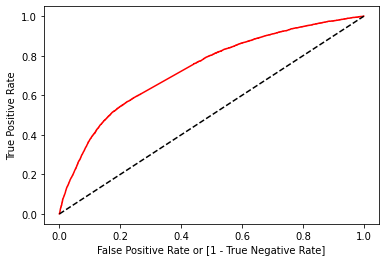

In [223]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(Y_train_h1n1, classifier.predict_proba (X_train)[:,1])

auc = roc_auc_score(Y_train_h1n1, y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')



